### Converting a SDF file into a csv file

In [21]:
# Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import PandasTools

In [153]:
sdfile = PandasTools.LoadSDF("LC_Antiviral_Library_2D_Similarity.sdf",
                            smilesName="SMILES",
                            molColName="Molecule",
                            includeFingerprints=True)

In [108]:
print(sdfile.columns)

Index(['IDNUMBER', 'fromRegid', 'Similarity', 'Target_name', 'Activity_type',
       'Activity_value', 'Activity_units', 'Target_organism', 'Target_type',
       'Chemical_Name', 'PriceCoeff', 'CAS', 'Description', 'clogP', 'MW',
       'Acceptor', 'Donor', 'RotBonds', 'FSP3', 'TPSA', 'HAC', 'Collection',
       'ID', 'SMILES', 'Molecule', 'LCTNUMBER'],
      dtype='object')


### Exploratory data analysis - activity measurements

In [44]:
# Number of targets
sdfile["Target_name"].nunique()

101

In [45]:
# Number of measurements per activity units per activity type
sdfile.groupby(["Activity_type","Activity_units"]).count()

IDNUMBER  fromRegid  Similarity  Target_name  \
Activity_type   Activity_units                                                 
Activity        %                   1107       1107        1107         1107   
                pg                     2          2           2            2   
                uM                     2          2           2            2   
                ug ml-1               19         19          19           19   
CC50            ug.mL-1               10         10          10           10   
CyD50           ug ml-1                2          2           2            2   
EC50            %                      1          1           1            1   
                nM                  1411       1411        1411         1411   
                ug.mL-1              546        546         546          546   
EC90            %                      1          1           1            1   
                uM                    54         54          54           54   
                ug ml-1                4          4           4            4   
ED50            %                      1          1           1            1   
                nM                     1          1           1            1   
                uM                    57         57          57           57   
                ug                     1          1           1            1   
                ug ml-1               37         37          37           37   
ED99            ug ml-1               56         56          56           56   
IC25            umol/L               797        797         797          797   
IC50            %                      1          1           1            1   
                nM                  4000       4000        4000         4000   
                ug.mL-1              265        265         265          265   
IC95            nM                    39         39          39           39   
ID50            ug ml-1                9          9           9            9   
Inhibition      %                   1458       1458        1458         1458   
                nM                    11         11          11           11   
Inhibition zone mM                     3          3           3            3   
Kd              nM                     4          4           4            4   
Ki              %                      1          1           1            1   
                nM                   126        126         126          126   
MED             uM                     4          4           4            4   
MIC             ug.mL-1               21         21          21           21   
MIC50           ug.mL-1                6          6           6            6   
MTL             ug ml-1               68         68          68           68   
PD50            %                      4          4           4            4   
PDD50           ug ml-1                2          2           2            2   
Survival        %                     12         12          12           12   
TC50            uM                     9          9           9            9   
Viability       %                      6          6           6            6   

                                Activity_value  Target_organism  Target_type  \
Activity_type   Activity_units                                                 
Activity        %                         1107             1107         1107   
                pg                           2                2            2   
                uM                           2                2            2   
                ug ml-1                     19               19           19   
CC50            ug.mL-1                     10               10           10   
CyD50           ug ml-1                      2                2            2   
EC50            %                            1                1            1   
                nM             

In [87]:
# Wi will take a look only at activity types with >= 1000 measurements

In [92]:
# Distribution of "Activity" measurements

activ = [float(item) for item in 
         sdfile[(sdfile["Activity_type"] == "Activity") & 
       (sdfile["Activity_units"] == "%")]["Activity_value"].values]

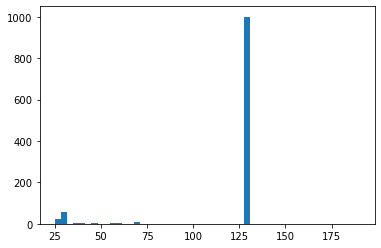

In [93]:
# Very unbalanced!
plt.hist(activ,bins=50);

In [82]:
# Distribution of EC50 measurements

ec50 = [float(item) for item in sdfile[(sdfile["Activity_type"] == "EC50") & 
       (sdfile["Activity_units"] == "nM")]["Activity_value"].values]

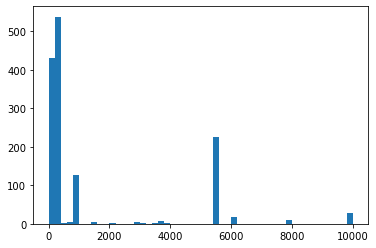

In [83]:
plt.hist(ec50,bins=50);

In [84]:
# Distribution of IC50 measurements

ic50 = [float(item) for item in sdfile[(sdfile["Activity_type"] == "IC50") & 
       (sdfile["Activity_units"] == "nM")]["Activity_value"].values]

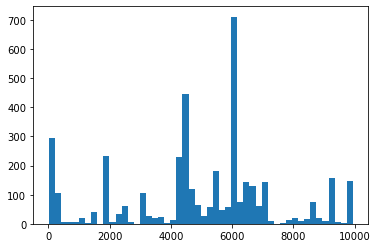

In [86]:
plt.hist(ic50,bins=50);

In [89]:
# Distribution of "Inhibition" measurements

inhib = [float(item) for item in 
         sdfile[(sdfile["Activity_type"] == "Inhibition") & 
       (sdfile["Activity_units"] == "%")]["Activity_value"].values]

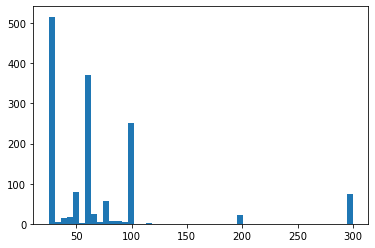

In [91]:
plt.hist(inhib,bins=50);

In [154]:
# Dropping out all columns except for "IC50" with values in "nM"

sdfile = sdfile[(sdfile["Activity_type"] == "IC50") & 
       (sdfile["Activity_units"] == "nM")]

In [155]:
# Converting the "Activity_value" column into float numbers
sdfile["IC50"] = sdfile["Activity_value"].apply(float)

In [156]:
# Splitting the activity values into 5 classes
def splitter5(value,low=0,high=10000):
    
    h = (high-low)/5
    
    if low <= value < low+h:
        return 0
    elif low+h <= value < low+2*h:
        return 1
    elif low+2*h <= value < low+3*h:
        return 2
    elif low+3*h <= value < low+4*h:
        return 3
    else:
        return 4

In [157]:
sdfile["Class"] = sdfile["IC50"].apply(splitter5)

In [158]:
# Writing out the modified sd file
PandasTools.WriteSDF(sdfile,"Antivirals_IC50",molColName="Molecule")

#### Reading in the ISIDA header file (for info on fragment descriptors)

In [159]:
# Header (.hdr) file - descriptor information
desc_info = pd.read_csv("Antivirals_IC50_IAB(2-4).hdr",
                        header=None,
                        delim_whitespace=True)
desc_info.drop(0,axis=1,inplace=True)
desc_info.rename(columns={1: "Fragment"})

,Fragment
0,C-Cl
1,C=C-Cl
2,C-C=C-Cl
3,C=C-C-Cl
4,C-C-Cl
...,...
233,C-I
234,C=C-I
235,C-C=C-I
236,C=C-C-I


#### Reading in the ISIDA fragment file (in the .svm format)

In [160]:
# ISIDA Fragment value file (.svm)
isida_value = pd.read_csv("Antivirals_IC50_IAB(2-4).svm",
                          header=None,
                          delimiter="?")
isida_value.drop(0,axis=1,inplace=True)

In [161]:
# Creating an array of ISIDA fragment counts for each molecule
mol_frag_vector_array = []

# Looping through the list of molecules (the mol variable)
for mol in isida_value[1]:
    mol_frag_num_list = [int(index.split(":")[0]) for index in mol.split()]
    mol_frag_count_list = [int(index.split(":")[1]) for index in mol.split()]
    
    # ISIDA fragment vector (insert 0 if fragment NOT in mol_frag_num_list else insert 
    # the corresponding value from mol_frag_num_count)
    mol_frag_vector = []
    for num in range(1,len(desc_info)+1):
        if num in mol_frag_num_list:
            mol_frag_vector.append(mol_frag_count_list.pop(0))
        else:
            mol_frag_vector.append(0)
    
    mol_frag_vector_array.append(mol_frag_vector)

In [162]:
# Creating the DataFrame of ISIDA fragment counts for machine learning
data_isida = pd.DataFrame(data=mol_frag_vector_array,
                          columns=list(range(1,len(desc_info)+1)))
data_isida.head()

,1,2,3,4,5,6,7,8,9,10,...,229,230,231,232,233,234,235,236,237,238
0,1,1,1,1,1,3,7,2,4,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
# Returns a tuple of (N_molecules,N_fragments)
data_isida.shape

(4000, 238)

## The GTM method

In the GTM method, the data is assumed to be a random variable $t$, drawn from an underlying mixture-of-gaussians distribution, with the probability density corresponding
to

$$ p(\textbf{t}|\textbf{x},\textbf{W},\beta) = \left( \frac{\beta}{2\pi} \right)^{D/2}exp\left\{- \frac{\beta}{2}\parallel \textbf{y}(\textbf{x};\textbf{W}) - \textbf{t} \parallel^{2}  \right\} $$

where $W$ is a matrix of RBF weight coefficients and $\beta$ inverse variance.
These are the parameters of the method.

To be continued ...

### Training a GTM classifier on ISIDA-encoded molecules

In [164]:
from ugtm import eGTC
from sklearn import datasets
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV

In [165]:
# Splitting the data into  a training and test set

X = data_isida # fragment descriptors
y = sdfile["Class"] # Class labels

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

# preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
# GTM parameter optimization using the GridSearchCV technique

# Parameters to tune
tuned_params = {'regul': [0.0001, 0.001, 0.01], # Regularization coeff.
                's': [0.1, 0.2, 0.3], # RBF width (the sigma)
                'k': [16], # Number of GTM grid nodes
                'm': [4]} # Number of GTM RBF centers

# GTM classifier (GTC), bayesian
gs = GridSearchCV(eGTC(),
                  tuned_params,
                  cv=None,
                  scoring='accuracy',
                  n_jobs=-1,
                    verbose=4)

gs.fit(X_train, y_train)
print(gs.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.4min finished


{'k': 16, 'm': 4, 'regul': 0.01, 's': 0.3}


In [167]:
# Predicting labels for X_test
gtc = eGTC(k=16,m=4,regul=0.01,s=0.1)
gtc = gtc.fit(X_train,y_train)
y_pred = gtc.predict(X_test)

In [320]:
# Print score

# Matthews correlation coefficient, values: 1 (perfect correlation),
# 0 (no correlation), -1 (opposite correlation between y_pred and y_true)

print(metrics.matthews_corrcoef(y_test,y_pred))

0.6679198919127055


In [321]:
# Classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       234
           1       0.47      0.35      0.40        94
           2       0.66      0.84      0.74       392
           3       0.91      0.85      0.88       435
           4       0.70      0.48      0.57       165

    accuracy                           0.75      1320
   macro avg       0.70      0.66      0.67      1320
weighted avg       0.76      0.75      0.75      1320



In [322]:
print(confusion_matrix(y_test,y_pred))

[[182   3  31   6  12]
 [ 15  33  38   4   4]
 [ 24  15 329  14  10]
 [  8   9  42 368   8]
 [  4  10  61  11  79]]


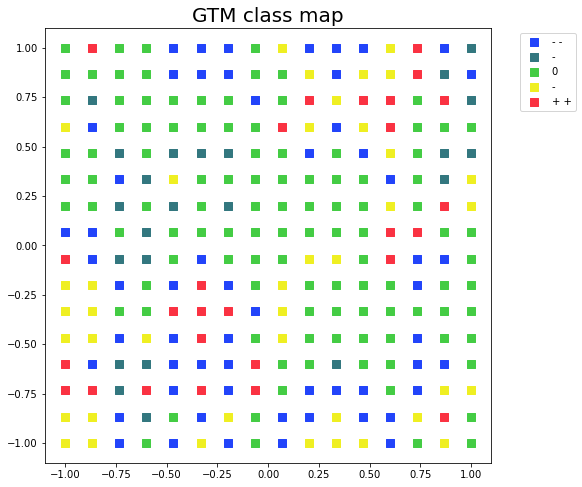

In [319]:
# Plotting the data

GTM_nodes = pd.DataFrame(gtc.optimizedModel.matX,columns=["X1","X2"])
GTM_nodes["predicted_node_label"] = gtc.node_label

fig,ax=plt.subplots(figsize=(8,8))
ax.set_title("GTM class map",fontsize=20)


ax.scatter(GTM_nodes[GTM_nodes["predicted_node_label"]==0]["X1"],
          GTM_nodes[GTM_nodes["predicted_node_label"]==0]["X2"],
          label="- -",
          color="#2244FA",
          marker="s",
          s=50)
ax.scatter(GTM_nodes[GTM_nodes["predicted_node_label"]==1]["X1"],
          GTM_nodes[GTM_nodes["predicted_node_label"]==1]["X2"],
          label="-",
          color="#33777F",
          marker="s",
          s=50)
ax.scatter(GTM_nodes[GTM_nodes["predicted_node_label"]==2]["X1"],
          GTM_nodes[GTM_nodes["predicted_node_label"]==2]["X2"],
          label="0",
          color="#44CC44",
          marker="s",
          s=50)
ax.scatter(GTM_nodes[GTM_nodes["predicted_node_label"]==3]["X1"],
          GTM_nodes[GTM_nodes["predicted_node_label"]==3]["X2"],
          label="-",
          color="#EFEF22",
          marker="s",
          s=50)
ax.scatter(GTM_nodes[GTM_nodes["predicted_node_label"]==4]["X1"],
          GTM_nodes[GTM_nodes["predicted_node_label"]==4]["X2"],
          label="+ +",
          color="#FA3242",
          marker="s",
          s=50)

ax.legend(bbox_to_anchor=(1.2,1))

In [277]:
from ugtm import eGTM
transformed = eGTM().fit(X_train).transform(X_test)

df = pd.DataFrame(transformed, columns=["x1", "x2"])

In [294]:
df["true class"] = y_test
df["predicted class"] = y_pred

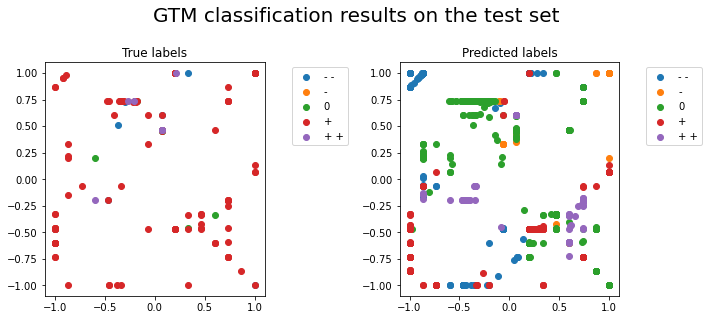

In [326]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("GTM classification results on the \
test set",y=1.1,fontsize=20)

ax[0].scatter(df[df["true class"]==0]["x1"],
          df[df["true class"]==0]["x2"],
             label="- -")
ax[0].scatter(df[df["true class"]==1]["x1"],
          df[df["true class"]==1]["x2"],
             label="-")
ax[0].scatter(df[df["true class"]==2]["x1"],
          df[df["true class"]==2]["x2"],
             label="0")
ax[0].scatter(df[df["true class"]==3]["x1"],
          df[df["true class"]==3]["x2"],
             label="+")
ax[0].scatter(df[df["true class"]==4]["x1"],
          df[df["true class"]==4]["x2"],
             label="+ +")
ax[0].set_title("True labels")
ax[0].legend()
ax[0].legend(bbox_to_anchor=(1.1,1))


ax[1].scatter(df[df["predicted class"]==0]["x1"],
          df[df["predicted class"]==0]["x2"],
             label="- -")
ax[1].scatter(df[df["predicted class"]==1]["x1"],
          df[df["predicted class"]==1]["x2"],
             label="-")
ax[1].scatter(df[df["predicted class"]==2]["x1"],
          df[df["predicted class"]==2]["x2"],
             label="0")
ax[1].scatter(df[df["predicted class"]==3]["x1"],
          df[df["predicted class"]==3]["x2"],
             label="+")
ax[1].scatter(df[df["predicted class"]==4]["x1"],
          df[df["predicted class"]==4]["x2"],
             label="+ +")
ax[1].legend(bbox_to_anchor=(1.1,1))
ax[1].set_title("Predicted labels")

plt.tight_layout()